In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from statsmodels.api import qqplot, add_constant


from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import os

In [2]:
def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))
def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [3]:
matplotlib.rc("font", family="NanumGothic")
plt.rcParams['axes.unicode_minus']=False
os.environ['PATH']+=os.pathsep+"~/anaconda3/lib/python3.7/site-packages"

# 데이터 불러오기


    1. 한 row는 한 건물에 대한 정보이다.
    2. 1970년대 보스턴은 아직 흑인 인종차별이 존재하던 시대로, 흑인 비율에 대한 집값변동의 가능성을 찾아 봐야겠다
    3. 산화질소와 집값의 관계성을 파악하기

In [4]:
bh=pd.read_csv("data/BigData/BOSTON_HOUSING.csv")
bh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
MEDV       506 non-null float64
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


    CHAS_tf :: 강조망의 경우 이산형 변수이기 때문에 범주형 데이터로 변환
    CHAS 컬럼은 삭제

In [5]:
bh['CHAS_tf']=[True if 1 else False for i in bh['CHAS']]
bh.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_tf
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,True
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,True
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,True
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,True
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,True


Tax 범주형으로 새로운 컬럼 생성

In [6]:
bh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
MEDV       506 non-null float64
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
CHAS_tf    506 non-null bool
dtypes: bool(1), float64(11), int64(3)
memory usage: 55.9 KB


In [7]:
#bh.drop('CHAS',axis=1, inplace=True)

# EDA

In [8]:
bh.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
CHAS_tf    0
dtype: int64

In [9]:
bh.describe().T

,count,mean,std,min,25%,50%,75%,max
MEDV,506.0,22.532806,9.197104,5.00000,17.025000,21.200001,25.000000,50.000000
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.256510,3.677083,88.976196
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.000000,12.500000,100.000000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.690000,18.100000,27.740000
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.000000,0.000000,1.000000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.871000
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.780000
AGE,506.0,68.574901,28.148862,2.90000,45.025000,77.500000,94.074999,100.000000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.126500
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.000000


In [217]:
def get_outlier(df=None, column=None, weight =1.5):
    target = df[column]
    #print(target.shape)
    q_25 = np.percentile(target.values,25)
    q_75 = np.percentile(target.values,75)
    
    iqr = q_75 - q_25
    iqr_weight = iqr * weight
    lowest_val = q_25 - iqr_weight
    highest_val = q_75 +iqr_weight

    return lowest_val, highest_val

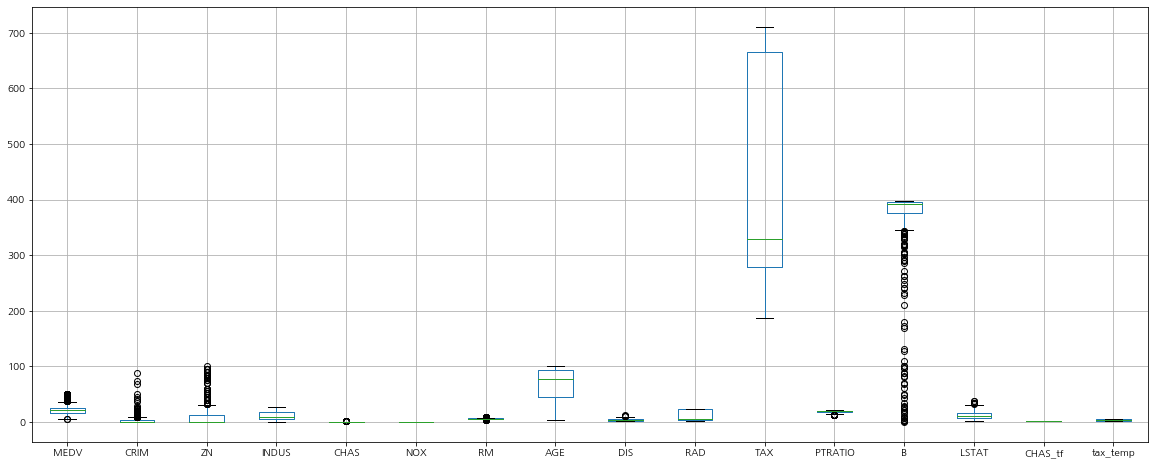

In [216]:
bh.boxplot(figsize=(20,8))

다른 지역 대비 흑인 인구 비율로 생각한다면 이 데이터 셋의 b컬럼에서는 이상치라고 판단되는 값은 존재하지 않는다.

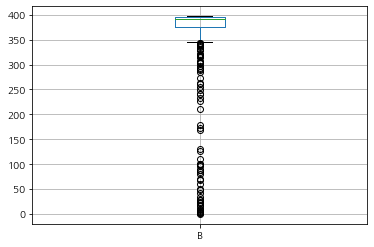

In [11]:
bh.boxplot("B")

In [16]:
bh[bh['B']<344.106].shape

(77, 15)

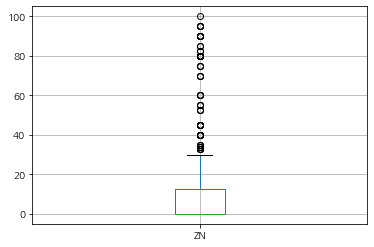

In [13]:
bh.boxplot("ZN")

In [201]:
bh['ZN'].value_counts().sort_values()

18.0       1
17.5       1
100.0      1
82.5       2
85.0       2
34.0       3
70.0       3
52.5       3
55.0       3
28.0       3
35.0       3
75.0       3
33.0       4
60.0       4
21.0       4
95.0       4
90.0       5
30.0       6
45.0       6
40.0       7
25.0      10
22.0      10
12.5      10
80.0      15
20.0      21
0.0      372
Name: ZN, dtype: int64

### outlier 범위 확인

In [220]:
mini, maxi=get_outlier(bh,"MEDV")
print("{}보다 작거나 {}보다 크면 이상치로 판단".format(mini.round(3), maxi.round(3)))

5.063보다 작거나 36.962보다 크면 이상치로 판단


In [221]:
mini, maxi=get_outlier(bh,"CRIM")
print("{}보다 작거나 {}보다 크면 이상치로 판단".format(mini.round(3), maxi.round(3)))

-5.311보다 작거나 9.07보다 크면 이상치로 판단


In [222]:
mini, maxi=get_outlier(bh,"ZN")
print("{}보다 작거나 {}보다 크면 이상치로 판단".format(mini.round(3), maxi.round(3)))

-18.75보다 작거나 31.25보다 크면 이상치로 판단


In [223]:
mini, maxi=get_outlier(bh,"CHAS")
print("{}보다 작거나 {}보다 크면 이상치로 판단".format(mini.round(3), maxi.round(3)))

0.0보다 작거나 0.0보다 크면 이상치로 판단


In [224]:
mini, maxi=get_outlier(bh,"RM")
print("{}보다 작거나 {}보다 크면 이상치로 판단".format(mini.round(3), maxi.round(3)))

4.779보다 작거나 7.73보다 크면 이상치로 판단


In [225]:
mini, maxi=get_outlier(bh,"DIS")
print("{}보다 작거나 {}보다 크면 이상치로 판단".format(mini.round(3), maxi.round(3)))

-2.532보다 작거나 9.821보다 크면 이상치로 판단


In [226]:
mini, maxi=get_outlier(bh,"PTRATIO")
print("{}보다 작거나 {}보다 크면 이상치로 판단".format(mini.round(3), maxi.round(3)))

13.2보다 작거나 24.4보다 크면 이상치로 판단


In [227]:
mini, maxi=get_outlier(bh,"B")
print("{}보다 작거나 {}보다 크면 이상치로 판단".format(mini.round(3), maxi.round(3)))

344.106보다 작거나 427.496보다 크면 이상치로 판단


In [228]:
mini, maxi=get_outlier(bh,"LSTAT")
print("{}보다 작거나 {}보다 크면 이상치로 판단".format(mini.round(3), maxi.round(3)))

-8.057보다 작거나 31.962보다 크면 이상치로 판단


In [18]:
bh.corr().T

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_tf
MEDV,1.000000,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663,NaN
CRIM,-0.388305,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,NaN
ZN,0.360445,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,NaN
INDUS,-0.483725,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,NaN
CHAS,0.175260,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,NaN
NOX,-0.427321,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,NaN
RM,0.695360,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355502,0.128069,-0.613808,NaN
AGE,-0.376955,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,NaN
DIS,0.249929,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,NaN
RAD,-0.381626,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,NaN


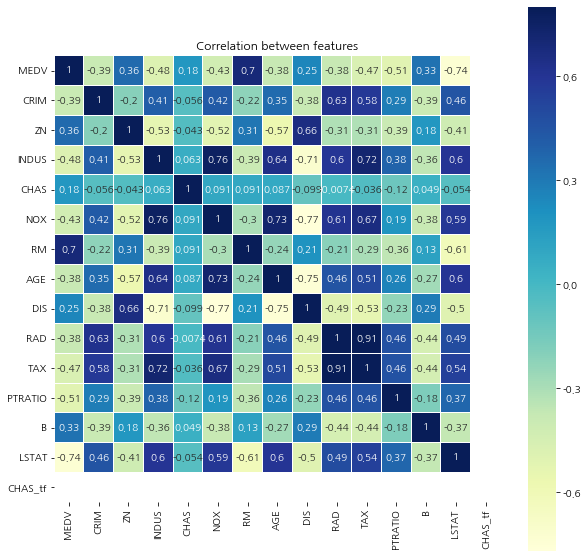

In [19]:
corr=bh.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [20]:
abs(corr['MEDV']).sort_values()

CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
AGE        0.376955
RAD        0.381626
CRIM       0.388305
NOX        0.427321
TAX        0.468536
INDUS      0.483725
PTRATIO    0.507787
RM         0.695360
LSTAT      0.737663
MEDV       1.000000
CHAS_tf         NaN
Name: MEDV, dtype: float64

In [21]:
abs(corr['DIS']).sort_values()

CHAS       0.099176
RM         0.205246
PTRATIO    0.232471
MEDV       0.249929
B          0.291512
CRIM       0.379670
RAD        0.494588
LSTAT      0.496996
TAX        0.534432
ZN         0.664408
INDUS      0.708027
AGE        0.747881
NOX        0.769230
DIS        1.000000
CHAS_tf         NaN
Name: DIS, dtype: float64

RM과 큰 양의 상관관계를 갖고 있다.

가설1. 강이 보이는 집은 가격이 높을 것이다.

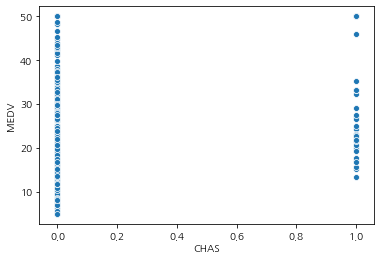

In [231]:
sns.scatterplot(x="CHAS", y="MEDV", data=bh)

In [239]:
len(bh[bh['CHAS']==0])

471

In [238]:
len(bh[bh['CHAS']==1])

35

In [243]:
chas=[]
chas.append(len(bh[bh['CHAS']==0]))
chas.append(len(bh[bh['CHAS']==1]))
labels=['NON-REVER VIEW', 'REVER VIEW']

([<matplotlib.patches.Wedge at 0x7fe4fc5b9b70>,
 [Text(-1.0741305283228182, 0.23715734887399958, 'NON-REVER VIEW'),
  Text(1.0741305449760203, -0.23715727344848092, 'REVER VIEW')],
 [Text(-0.5858893790851735, 0.1293585539312725, '93.1%'),
  Text(0.5858893881687384, -0.12935851279008048, '6.9%')])

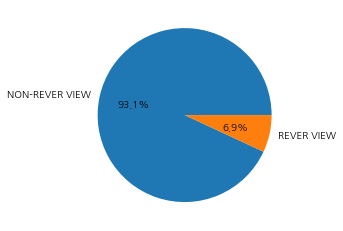

In [245]:
plt.pie(chas,labels=labels ,autopct='%1.1f%%')

In [246]:
bh.groupby('CHAS')['MEDV'].mean()

CHAS
0    22.093843
1    28.440000
Name: MEDV, dtype: float64

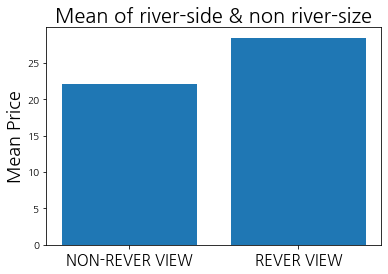

In [253]:
index = np.arange(len(labels))

# Basic Bar Chart

plt.bar(index, bh.groupby('CHAS')['MEDV'].mean())

plt.title('Mean of river-side & non river-size', fontsize=20)

plt.ylabel('Mean Price', fontsize=18)

plt.xticks(index, labels, fontsize=15)

plt.show()




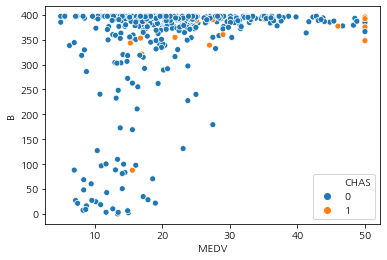

In [234]:
sns.scatterplot(x="MEDV", y="B",hue="CHAS", data=bh)

가설2. 범죄율에 따라 집값 변화가 존재할 것이다.

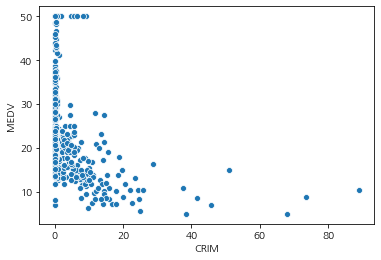

In [255]:
sns.scatterplot(x="CRIM", y="MEDV", data=bh)

그럼 혹시, 흑인 인구비율이 높은 지역의 범죄율이 높고 그것이 집값에 영향을 미치지는 않았을까?

In [261]:
bh['CRIM'].value_counts()

0.015010     2
14.333700    2
25.940599    1
0.475470     1
0.840540     1
0.761620     1
0.269380     1
9.513630     1
14.438300    1
0.537000     1
1.342840     1
0.123290     1
0.221880     1
0.772990     1
0.131580     1
0.036590     1
0.050590     1
0.078750     1
0.049320     1
0.092520     1
4.898220     1
2.330990     1
4.541920     1
13.075100    1
0.045900     1
0.061620     1
4.038410     1
7.672020     1
0.055610     1
3.678220     1
            ..
0.045600     1
0.093780     1
0.040110     1
0.211240     1
0.136420     1
18.498199    1
0.671910     1
0.021770     1
22.597099    1
0.790410     1
0.019510     1
10.062300    1
88.976196    1
2.300400     1
4.646890     1
0.066640     1
0.090650     1
0.114600     1
0.141500     1
0.148660     1
13.678100    1
24.393801    1
0.369200     1
0.144760     1
0.171710     1
0.229690     1
0.412380     1
0.061270     1
0.239120     1
4.871410     1
Name: CRIM, Length: 504, dtype: int64

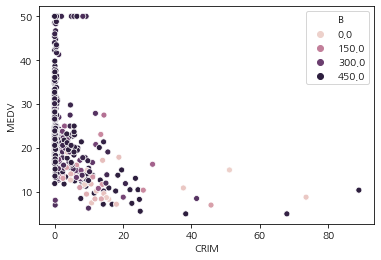

In [257]:
sns.scatterplot(x="CRIM",y="MEDV",data=bh,hue="B")

In [265]:
temp=bh[['CRIM','MEDV']]
temp.sort_values(by='CRIM',inplace=True)


/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0, 0.5, '평균 집값')

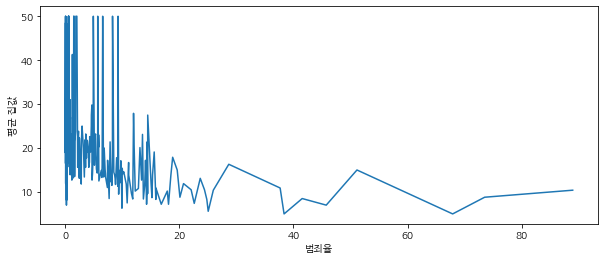

In [270]:
plt.rcParams["figure.figsize"] = (10,4)

plt.plot(temp['CRIM'], temp['MEDV'])
plt.xlabel("범죄율");plt.ylabel("평균 집값")


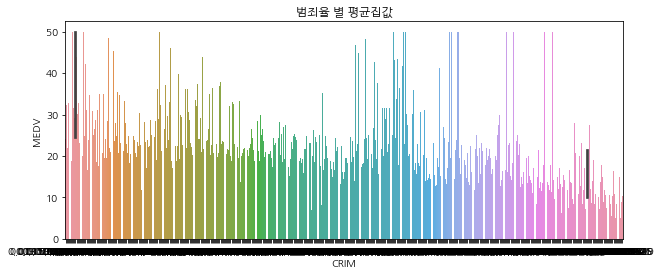

<Figure size 720x288 with 0 Axes>

In [262]:
plt.rcParams["figure.figsize"] = (10,4)
sns.barplot(x="CRIM", y="MEDV", data=bh)
plt.title("범죄율 별 평균집값")
plt.figure()
plt.show()

(array([439.,  44.,  14.,   1.,   3.,   2.,   0.,   1.,   1.,   1.]),
 array([6.32000000e-03, 8.90330763e+00, 1.78002953e+01, 2.66972829e+01,
        3.55942705e+01, 4.44912581e+01, 5.33882458e+01, 6.22852334e+01,
        7.11822210e+01, 8.00792087e+01, 8.89761963e+01]),
 <a list of 10 Patch objects>)

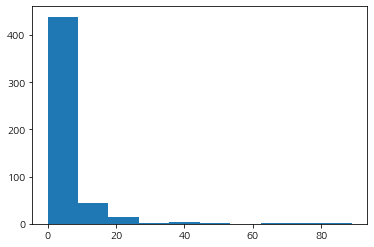

In [259]:
plt.hist(bh['CRIM'])

가설3. 흑인비율은 집값에 영향을 미치지 않았을 것이다.

#### 흑인 비율이 많은 동네가 강도 보이고 비싸다...

In [282]:
temp=bh[bh['CHAS']==0][['CHAS','MEDV','B']]
temp.sort_values(by='B',inplace=True)


Text(0, 0.5, '평균 집값')

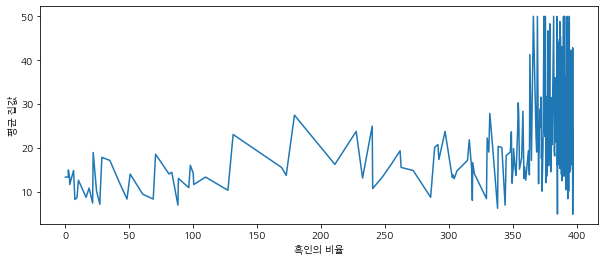

In [284]:
plt.rcParams["figure.figsize"] = (10,4)

plt.plot(temp['B'], temp['MEDV'])
plt.xlabel("흑인의 비율");plt.ylabel("평균 집값")


Text(0, 0.5, '평균 집값')

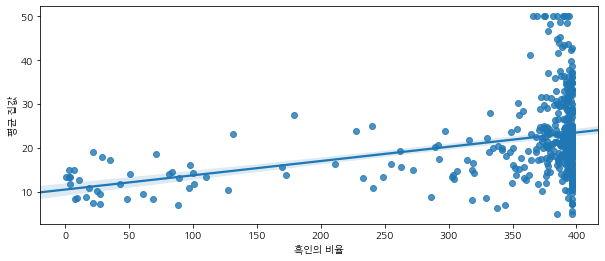

In [286]:
sns.regplot(x="B",y="MEDV",data=temp)

plt.xlabel("흑인의 비율");plt.ylabel("평균 집값")


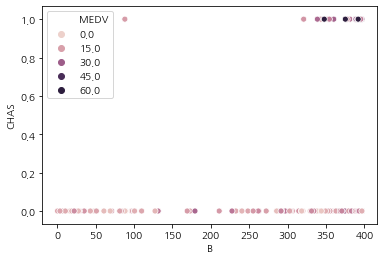

In [22]:
sns.scatterplot(x="B",y="CHAS",data=bh,hue="MEDV")

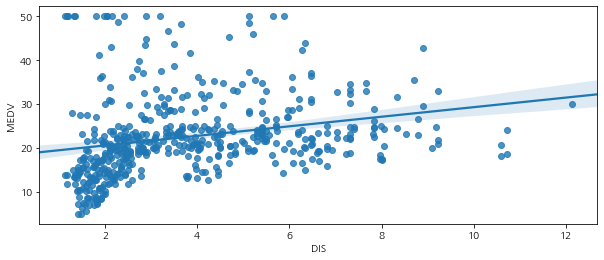

In [275]:
sns.regplot(x="DIS",y="MEDV",data=bh)

가설 4. 산화질소 농도는 사람들이 살아가는데에 부정적인 영향을 미쳤을 것이다.

### 공장 근처의 경우 NOX(산화 질소 농도)가 높아지게 되는데, 아래 두 그래프를 보면 공장지대에 가까워질 수록 집값이 낮아지고, 주거지 비율이 감소하는 경향을 찾을 수 있었다.

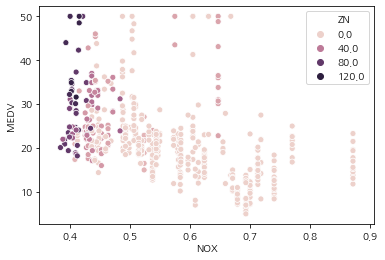

In [23]:
sns.scatterplot(x="NOX",y="MEDV",data=bh, hue="ZN")

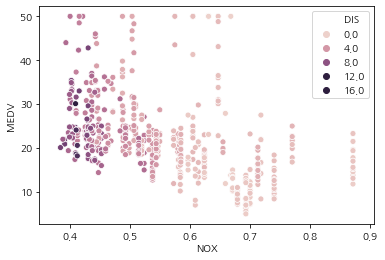

In [37]:
sns.scatterplot(x="NOX",y="MEDV",data=bh, hue="DIS")

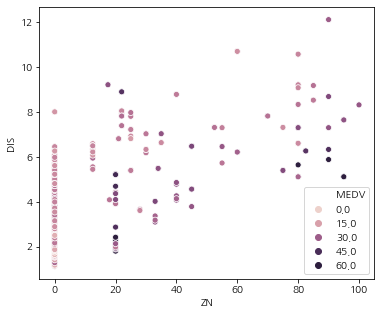

In [293]:
plt.rcParams["figure.figsize"] = (6,5)

sns.scatterplot(x="ZN",y="DIS",data=bh, hue="MEDV")


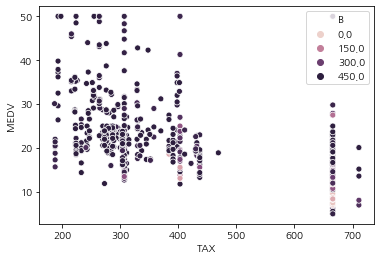

In [107]:
sns.scatterplot(x="TAX",y="MEDV",data=bh, hue="B")

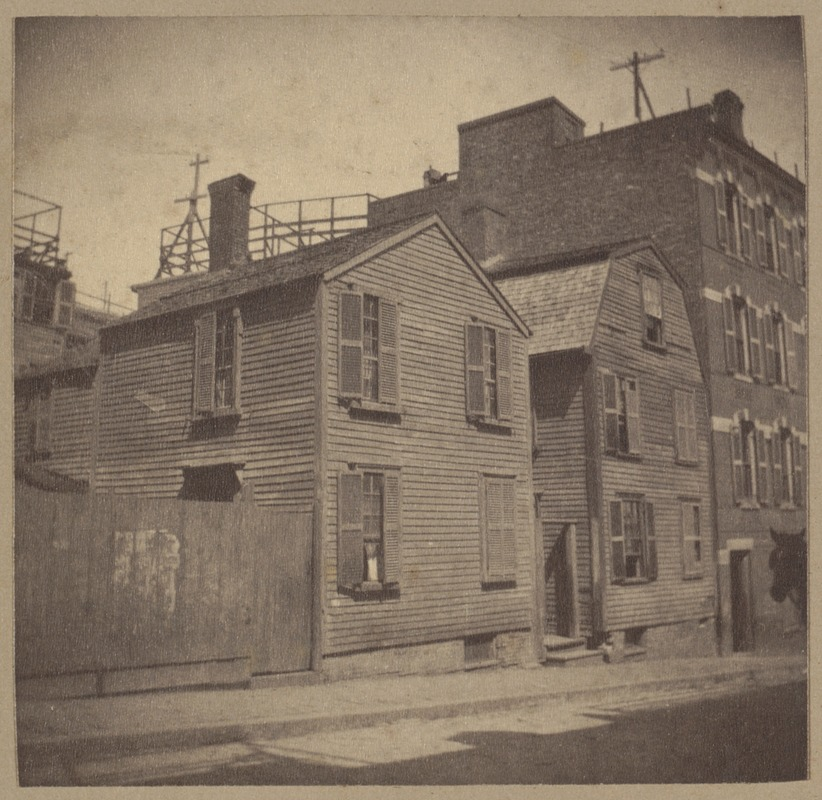

In [25]:
temp=pd.DataFrame(bh['AGE'].value_counts())
temp.reset_index(inplace=True)
temp.head()


,index,AGE
0,100.000000,43
1,96.000000,4
2,98.800003,4
3,87.900002,4
4,97.900002,4


<BarContainer object of 356 artists>

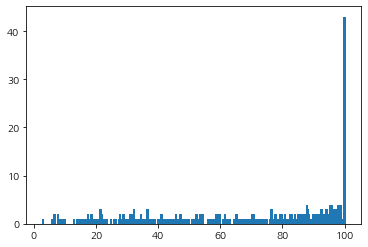

In [26]:
plt.bar(x=temp['index'], height=temp['AGE'])

    오래된 집이 많았던 것으로 추측...
    그럼 오래된 집일 수록 값이 저렴할까?

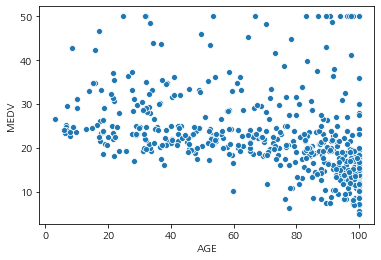

In [27]:
sns.scatterplot(x="AGE",y="MEDV",data=bh)

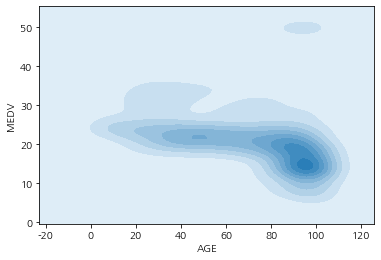

In [28]:
sns.kdeplot(bh['AGE'], bh['MEDV'], shade=True)

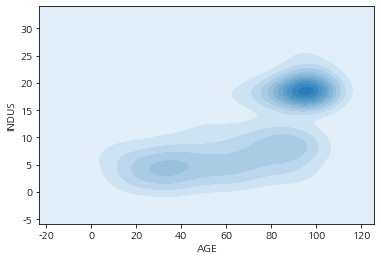

In [202]:
# 노후 건물의 비율과 비소매업 비율
sns.kdeplot(bh['AGE'], bh['INDUS'], shade=True)

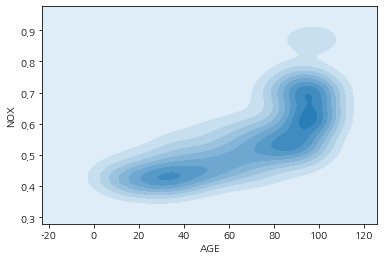

In [30]:
sns.kdeplot(bh['AGE'], bh['NOX'], shade=True)

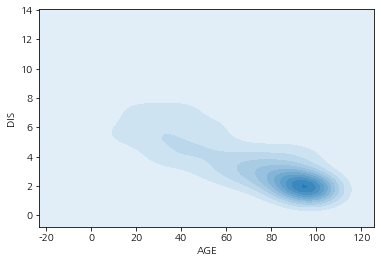

In [31]:
sns.kdeplot(bh['AGE'], bh['DIS'], shade=True)

* CRIM
* ZN
* INDUS
* CHAS
* NOX
* RM
* AGE
* DIS
* RAD
* TAX
* PTRATIO
* B
* LSTAT

# 목표변수와 설명변수 나누기

In [135]:
df_x=bh[['INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']]
df_x

,INDUS,CHAS,NOX,RM,DIS,PTRATIO,LSTAT
0,2.31,0,0.538,6.575,4.0900,15.300000,4.980000
1,7.07,0,0.469,6.421,4.9671,17.799999,9.140000
2,7.07,0,0.469,7.185,4.9671,17.799999,4.030000
3,2.18,0,0.458,6.998,6.0622,18.700001,2.940000
4,2.18,0,0.458,7.147,6.0622,18.700001,5.330000
5,2.18,0,0.458,6.430,6.0622,18.700001,5.210000
6,7.87,0,0.524,6.012,5.5605,15.200000,12.430000
7,7.87,0,0.524,6.172,5.9505,15.200000,19.150000
8,7.87,0,0.524,5.631,6.0821,15.200000,29.930000
9,7.87,0,0.524,6.004,6.5921,15.200000,17.100000


In [136]:
df_y=bh['MEDV']
#df_x=bh.drop('MEDV', axis=1)
print(df_y.shape)
print(df_x.shape)

(506,)
(506, 7)


Cross-validation을 하기 위해서 데이터를 4:3:3으로 나눈다

In [137]:
# # x: 설명변수 데이터, y: 목표변수 데이터, test_size: test데이터 비율, random_state:random_seed

train_x, test_x, train_y, test_y = train_test_split(df_x,df_y, test_size=0.3,
                                                               random_state=1234)

print("train data X size :{}".format(train_x.shape))
print("train data Y size :{}".format(train_y.shape))

print("test data X size :{}".format(test_x.shape))
print("test data Y size :{}".format(test_y.shape))

train data X size :(354, 7)
train data Y size :(354,)
test data X size :(152, 7)
test data Y size :(152,)


In [138]:
s=""
for x in train_x.columns:
     s+=x+"+"
s

'INDUS+CHAS+NOX+RM+DIS+PTRATIO+LSTAT+'

In [139]:
# reg_model = smf.ols(formula="MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+\
# DIS+RAD+TAX+PTRATIO+B+LSTAT", data=bh)

# reg_result = reg_model.fit()
# print(reg_result.summary())

Durbin-Watson계수나 각 변수들의 p-value를 확인해본 결과 모델 개선이 필요하다고 판단

### 후진제거법을 이용한 변수 선택

In [140]:
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select = 7).fit(train_x, train_y)

selected_cols = train_x.columns[rfe.support_]
removed_cols = train_x.columns[~rfe.support_]

print("Selected Varibles : {}".format(selected_cols))
print("Removed Varibles : {}".format(removed_cols))

Selected Varibles : Index(['INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], dtype='object')
Removed Varibles : Index([], dtype='object')


In [141]:
s=""
for d in selected_cols:
    s+=d+"+"
print(s)

INDUS+CHAS+NOX+RM+DIS+PTRATIO+LSTAT+


In [142]:
# 선형 회귀 분석
reg_model  =smf.ols(formula="MEDV ~ INDUS+CHAS+NOX+RM+DIS+PTRATIO+LSTAT", data=bh)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     179.7
Date:                Fri, 25 Oct 2019   Prob (F-statistic):          6.98e-132
Time:                        09:44:59   Log-Likelihood:                -1521.4
No. Observations:                 506   AIC:                             3059.
Df Residuals:                     498   BIC:                             3093.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.5090      4.576      7.978      0.0

INDUS를 빼자!

In [143]:
# 선형 회귀 분석
reg_model  =smf.ols(formula="MEDV ~ CHAS+NOX+RM+DIS+PTRATIO+LSTAT", data=bh)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     209.4
Date:                Fri, 25 Oct 2019   Prob (F-statistic):          7.91e-133
Time:                        09:44:59   Log-Likelihood:                -1522.0
No. Observations:                 506   AIC:                             3058.
Df Residuals:                     499   BIC:                             3088.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.9226      4.559      8.099      0.0

이상치를 고려해서 RobustScaler를 사용해서 표준화를 시키자!

In [144]:
df_x_lr=df_x.drop('INDUS',axis=1)

In [145]:
df_x_rfe = df_x_lr[df_x_lr.columns]
df_x_rfe_const = add_constant(df_x_rfe)

df_rfe_vif = pd.DataFrame()
df_rfe_vif['variable'] = df_x_rfe_const.columns
df_rfe_vif['VIF'] = [variance_inflation_factor(df_x_rfe_const.values, i) for i in range(df_x_rfe_const.shape[1])]

df_rfe_vif.sort_values("VIF", inplace=True)
df_rfe_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
1,CHAS,1.045
5,PTRATIO,1.236
3,RM,1.699
6,LSTAT,2.383
4,DIS,2.558
2,NOX,2.903
0,const,432.264


In [146]:
scaler = RobustScaler()

cols= df_x_lr.columns

np_scaled = scaler.fit_transform(df_x_lr)
df_scaled = pd.DataFrame(np_scaled, columns = cols)

df_scaled['MEDV'] = bh['MEDV']
reg_model_scaled = smf.ols(formula="MEDV ~CHAS+NOX+RM+DIS+PTRATIO+LSTAT", data = df_scaled)
reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     209.4
Date:                Fri, 25 Oct 2019   Prob (F-statistic):          7.91e-133
Time:                        09:44:59   Log-Likelihood:                -1522.0
No. Observations:                 506   AIC:                             3058.
Df Residuals:                     499   BIC:                             3088.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.1215      0.284     81.506      0.0

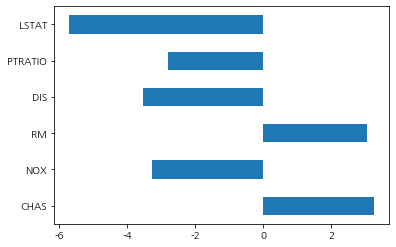

In [147]:
df_reg_scaled_coef = pd.DataFrame({"Coef":reg_result_scaled.params.values[1:]}, index = df_x_lr.columns)
df_reg_scaled_coef.plot.barh(y="Coef", legend=False)
plt.show()

# Decision Tree

In [148]:
tree_uncustomize = DecisionTreeRegressor(random_state=1234)
tree_uncustomize.fit(train_x, train_y)

# Train 데이터 설명력
print("Score on training set : {:.3f}".format(tree_uncustomize.score(train_x,train_y)))

# Test 데이터 설명력 
print("Score on test set : {:.3f}".format(tree_uncustomize.score(test_x,test_y)))

Score on training set : 1.000
Score on test set : 0.821


In [171]:
# train 및 test 설명력 결과 저장
train_score = []; test_score=[]

# 잎사귀 최소 자료수를 para_leaf에 저장 (1~19)
para_leaf = [n_leaf*1 for n_leaf in range(1,20,2)]

for v_min_samples_leaf in para_leaf:
    # 각 최소 자료수에 대해서 train과 test의 설명력을 저장함
    tree= DecisionTreeRegressor(random_state =1234, min_samples_leaf=v_min_samples_leaf)
    tree.fit(train_x, train_y)
    train_score.append(tree.score(train_x, train_y))
    test_score.append(tree.score(test_x,test_y))

# 결과 저장
df_score_leaf=pd.DataFrame()
df_score_leaf['MinSamplesLeaf']=para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['TestScore']=test_score

In [172]:
# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.821
1,3,0.962,0.862
2,5,0.924,0.861
3,7,0.876,0.852
4,9,0.857,0.837
5,11,0.840,0.834
6,13,0.829,0.821
7,15,0.806,0.807
8,17,0.802,0.813
9,19,0.793,0.797


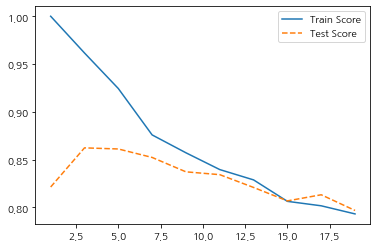

In [173]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle="-",label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test Score")
plt.legend()

leaf 는 15 선택

In [174]:
# train 및 test 설명력 결과 저장
train_score = []; test_score=[]

# 잎사귀 최소 자료수를 para_leaf에 저장 (1~19)
para_split = [n_split*2 for n_split in range(2,100,2)]

for v_min_samples_split in para_split:
    # 각 최소 자료수에 대해서 train과 test의 설명력을 저장함
    tree= DecisionTreeRegressor(random_state =1234, min_samples_leaf= 15, min_samples_split=v_min_samples_split)
    tree.fit(train_x, train_y)
    train_score.append(tree.score(train_x,train_y))
    test_score.append(tree.score(test_x, test_y))

# 결과 저장
df_score_split=pd.DataFrame()
df_score_split['MinSamplesSplit']=para_split
df_score_split['TrainScore']=train_score
df_score_split['TestScore']=test_score

In [175]:
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.806,0.807
1,8,0.806,0.807
2,12,0.806,0.807
3,16,0.806,0.807
4,20,0.806,0.807
5,24,0.806,0.807
6,28,0.806,0.807
7,32,0.805,0.810
8,36,0.805,0.810
9,40,0.798,0.810


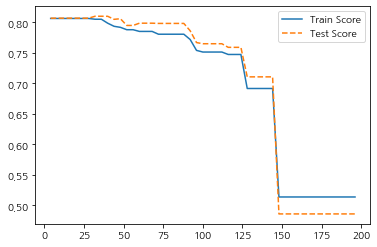

In [176]:
plt.plot(para_split, train_score,linestyle="-", label ="Train Score")
plt.plot(para_split, test_score, linestyle="--", label="Test Score")
plt.legend()

In [177]:
# train 및 test 설명력 결과 저장
train_score = []; test_score=[]

# 잎사귀 최소 자료수를 para_leaf에 저장 (1~19)
para_depth = [depth for depth in range(1,20)]

for v_max_depth in para_depth:
    # 각 최소 자료수에 대해서 train과 test의 설명력을 저장함
    tree= DecisionTreeRegressor(random_state =1234,min_samples_leaf=15, min_samples_split=40, max_depth=v_max_depth)
    tree.fit(train_x, train_y)
    train_score.append(tree.score(train_x, train_y))
    test_score.append(tree.score(test_x,test_y))

# 결과 저장
df_score_depth=pd.DataFrame()
df_score_depth['MinSamplesSplit']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['TestScore']=test_score

In [178]:
df_score_depth.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,1,0.442,0.443
1,2,0.692,0.711
2,3,0.769,0.784
3,4,0.786,0.808
4,5,0.796,0.808
5,6,0.798,0.810
6,7,0.798,0.810
7,8,0.798,0.810
8,9,0.798,0.810
9,10,0.798,0.810


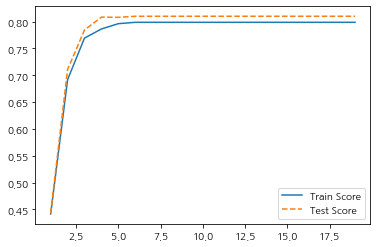

In [179]:
plt.plot(para_depth, train_score, linestyle="-", label ="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.legend()

In [180]:
tree_final = DecisionTreeRegressor(min_samples_leaf = 15, min_samples_split=40, max_depth=8,
                                  random_state=1234)
tree_final.fit(train_x,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=15,
                      min_samples_split=40, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1234, splitter='best')

In [181]:
list(selected_cols)

['INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']

In [182]:
v_feature_name=train_x.columns

In [183]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
6,LSTAT,0.659
3,RM,0.303
4,DIS,0.028
2,NOX,0.006
5,PTRATIO,0.003
0,INDUS,0.000
1,CHAS,0.000


Text(0, 0.5, '변수')

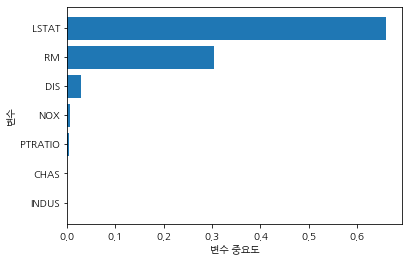

In [184]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel('변수')

In [163]:
print(tree_final.score(test_x,test_y))

0.7378000641540065


# RandomForest

df_x=bh[['INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']]

* INDUS : 비소매업 비율
* CHAS : 강 조망권
* NOX : 산화질소 농도
* RM : 방개수
* DIS : 중심지 접근 거리
* PTRATIO : 학생당 교사 비율
* LSTAT : 저소득층 비율

In [207]:
rf_uncustomize=RandomForestRegressor(random_state=1234)
rf_uncustomize.fit(train_x, train_y)

print("Score on training set : {:.3f}".format(rf_uncustomize.score(train_x, train_y)))
print("Score on test set : {:.3f}".format(rf_uncustomize.score(test_x, test_y)))

Score on training set : 0.976
Score on test set : 0.869


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [209]:
train_score=[]; test_score=[]

para_n_tree=[n_tree*10 for  n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf=RandomForestRegressor(n_estimators=v_n_estimators, random_state=1234)
    rf.fit(train_x, train_y)
    train_score.append(rf.score(train_x, train_y))
    test_score.append(rf.score(test_x,test_y))

    
df_score_n = pd.DataFrame()
df_score_n['n_estimators']=para_n_tree
df_score_n['TrainScore']=train_score
df_score_n['TestScore']=test_score
df_score_n['sub']= abs(df_score_n['TrainScore']-df_score_n['TestScore'])
df_score_n.round(3)

,n_estimators,TrainScore,TestScore,sub
0,10,0.976,0.869,0.107
1,20,0.980,0.888,0.092
2,30,0.981,0.886,0.094
3,40,0.980,0.886,0.093
4,50,0.980,0.884,0.096
5,60,0.981,0.883,0.098
6,70,0.981,0.884,0.097
7,80,0.982,0.883,0.099
8,90,0.982,0.885,0.097
9,100,0.981,0.885,0.096


In [ ]:
plt.plot(para_n_tree, train_score, linestyle="-", label="Train score")
plt.plot(para_n_tree, test_score, linestyle="--", label="Test score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

In [210]:
train_score=[]; test_score=[]

para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf=RandomForestRegressor(random_state=1234, n_estimators=30, min_samples_leaf =v_min_samples_leaf)
    rf.fit(train_x, train_y)
    train_score.append(rf.score(train_x,train_y))
    test_score.append(rf.score(test_x,test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf']=para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['TestScore']=test_score
df_score_leaf['sub']= abs(df_score_leaf['TrainScore']-df_score_leaf['TestScore'])


df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore,sub
0,1,0.981,0.886,0.094
1,2,0.964,0.882,0.082
2,3,0.940,0.885,0.055
3,4,0.918,0.876,0.042
4,5,0.900,0.868,0.032
5,6,0.885,0.859,0.026
6,7,0.874,0.856,0.018
7,8,0.861,0.857,0.004
8,9,0.854,0.855,0.001
9,10,0.845,0.850,0.005


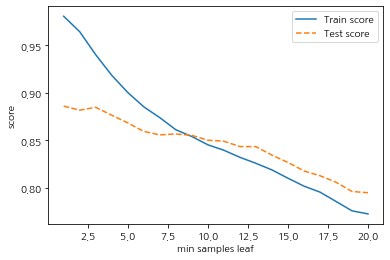

In [189]:
plt.plot(para_leaf, train_score, linestyle="-", label="Train score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

In [191]:
train_score=[]; test_score=[]

para_split = [n_split*2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf=RandomForestRegressor(random_state=1234, n_estimators=30, min_samples_leaf = 8, 
                            min_samples_split=v_min_samples_split)
    rf.fit(train_x, train_y)
    train_score.append(rf.score(train_x, train_y))
    test_score.append(rf.score(test_x, test_y))

df_score_split = pd.DataFrame()
df_score_split['MinSamplesLeaf']=para_split
df_score_split['TrainScore']=train_score
df_score_split['TestScore']=test_score
df_score_split['sub']=abs(df_score_split['TrainScore']-df_score_split['TestScore'])

df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore,sub
0,4,0.861,0.857,0.004
1,6,0.861,0.857,0.004
2,8,0.861,0.857,0.004
3,10,0.861,0.857,0.004
4,12,0.861,0.857,0.004
5,14,0.861,0.857,0.004
6,16,0.861,0.857,0.004
7,18,0.859,0.857,0.003
8,20,0.855,0.854,0.001
9,22,0.853,0.852,0.000


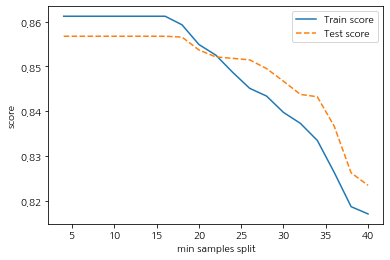

In [192]:
plt.plot(para_split, train_score, linestyle="-", label="Train score")
plt.plot(para_split, test_score, linestyle="--", label="Test score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

In [194]:
train_score=[]; test_score=[]

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf=RandomForestRegressor(random_state=1234, n_estimators=30,
                             min_samples_leaf=8, min_samples_split=20, max_depth=v_max_depth)
    rf.fit(train_x, train_y)
    train_score.append(rf.score(train_x, train_y))
    test_score.append(rf.score(test_x, test_y))

df_score_depth = pd.DataFrame()
df_score_depth['Depth']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['TestScore']=test_score
df_score_depth['sub']=abs(df_score_depth['TrainScore']-df_score_depth['TestScore'])
df_score_depth.round(3)

,Depth,TrainScore,TestScore,sub
0,1,0.575,0.595,0.020
1,2,0.766,0.777,0.011
2,3,0.822,0.833,0.011
3,4,0.842,0.851,0.009
4,5,0.851,0.853,0.002
5,6,0.854,0.853,0.000
6,7,0.855,0.854,0.001
7,8,0.855,0.854,0.001
8,9,0.855,0.854,0.001
9,10,0.855,0.854,0.001


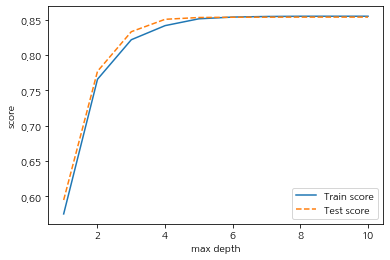

In [195]:
plt.plot(para_depth, train_score, linestyle="-", label="Train score")
plt.plot(para_depth, test_score, linestyle="--", label="Test score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

In [196]:
rf_final = RandomForestRegressor(random_state=1234, n_estimators=30, min_samples_leaf=8,
                                 min_samples_split=20, max_depth=5)
rf_final.fit(train_x, train_y)

print("Score on training set :{:.3f}".format(rf_final.score(train_x, train_y)))
print("Score on test set : {:.3f}".format(rf_final.score(test_x, test_y)))

Score on training set :0.851
Score on test set : 0.853


In [197]:
df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
6,LSTAT,0.569
3,RM,0.368
4,DIS,0.023
2,NOX,0.022
5,PTRATIO,0.011
0,INDUS,0.007
1,CHAS,0.000


Text(0, 0.5, '변수')

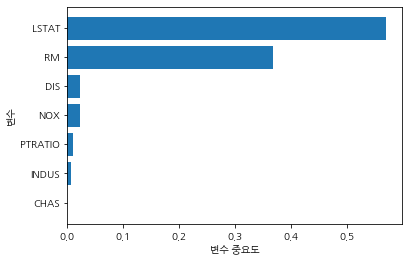

In [198]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))

plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# Gradient Boosting

In [203]:
rf_uncustomize=GradientBoostingRegressor(random_state=1234)
rf_uncustomize.fit(train_x,train_y)

print("Score on training set : {:.3f}".format(rf_uncustomize.score(train_x, train_y)))
print("Score on test set : {:.3f}".format(rf_uncustomize.score(test_x, test_y)))

Score on training set : 0.971
Score on test set : 0.887


In [204]:
train_score=[]; test_score=[]

para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=v_n_estimators)
    gb.fit(train_x,train_y)
    train_score.append(gb.score(train_x, train_y))
    test_score.append(gb.score(test_x,test_y))
    
df_score_n = pd.DataFrame()
df_score_n['n_estimators']=para_n_tree
df_score_n['TrainScore']=train_score
df_score_n['TestScore']=test_score

df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.767,0.746
1,20,0.903,0.860
2,30,0.934,0.878
3,40,0.948,0.883
4,50,0.955,0.885
5,60,0.960,0.886
6,70,0.963,0.887
7,80,0.966,0.887
8,90,0.968,0.888
9,100,0.971,0.887


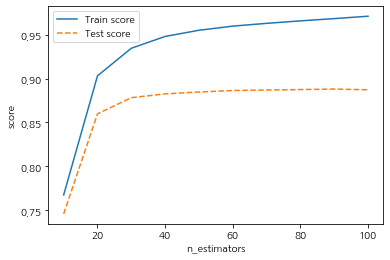

In [205]:
plt.plot(para_n_tree, train_score, linestyle="-", label="Train score")
plt.plot(para_n_tree, test_score, linestyle="--", label="Test score")
plt.ylabel("score"); plt.xlabel("n_estimators")

plt.legend()